In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# keeps the plots in one place. calls image as static pngs
%matplotlib inline 
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import seaborn as sns
import graphviz
#import mpld3 as mpl

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import preprocessing


C:\Users\spahuja\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data.csv', header = 0)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Clean and prepare data

In [33]:
df = df.drop('id', axis=1)
df1 = df.drop('diagnosis', axis = 1)
#df.drop('Unnamed: 32',axis=1,inplace=True)
# size of the dataframe
len(df)

569

In [35]:
df.shape

(569, 31)

In [6]:
# Scaling the dataset
data_s = pd.DataFrame(preprocessing.scale(df.iloc[:,1:32]))
data_s.columns = list(df.iloc[:,1:32].columns)
data_s['diagnosis'] = df['diagnosis']
data_s.head()



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,M
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,M
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,M
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,M


In [7]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Data Exploration

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


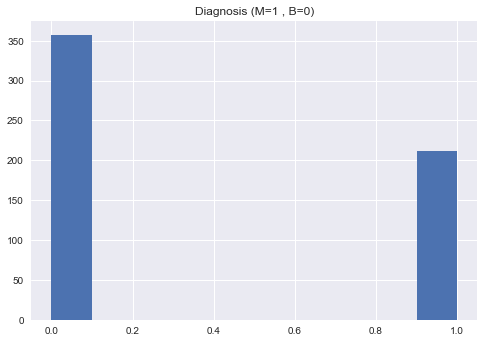

In [10]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

Nucleus features vs Diagnosis

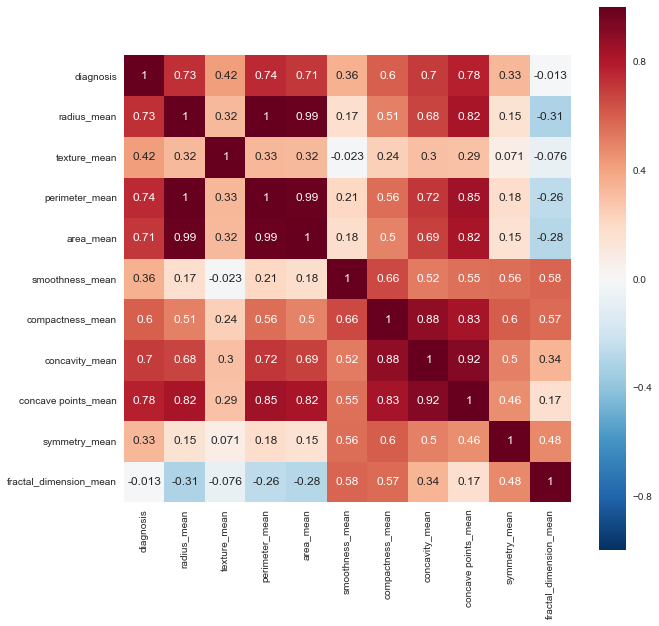

In [11]:
#draw a heatmap between mean features and diagnosis
features_mean = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
plt.figure(figsize=(10,10))
heat = sns.heatmap(df[features_mean].corr(), vmax=1, square=True, annot=True)


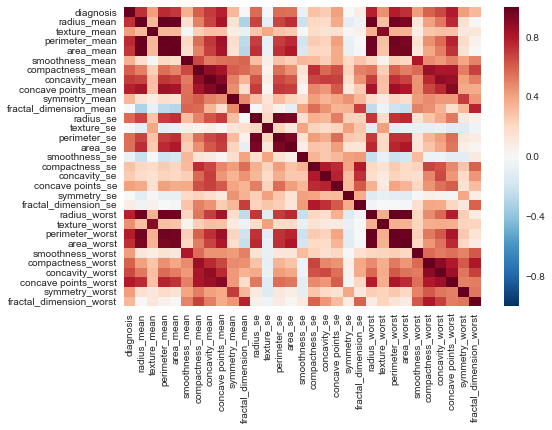

In [12]:
corr=df.corr()
sns.heatmap(corr)

In [13]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

In [14]:
features_mean

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

Creating a training set and test set

In [15]:
traindf, testdf = train_test_split(df, test_size = 0.3)

In [16]:
traindf.shape

(398, 31)

In [17]:
testdf.shape

(171, 31)

In [18]:
#Generic function for making a classification model and accessing the performance. 
from sklearn import tree
import pydotplus 

def classification_model(model, data, predictors, outcome, test):
  #Fit the model:
    model.fit(data[predictors],data[outcome])
    
  
  #Make predictions on training set:
    predictions = model.predict(data[predictors])
    predictions_test = model.predict(test[predictors])
  
  #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    accuracy_test = metrics.accuracy_score(predictions_test,test[outcome])

    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("Accuracy in test data : %s" % "{0:.3%}".format(accuracy_test))

 

  #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
      train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
      train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
      model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
      error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
      print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  #Fit the model again so that it can be refered outside the function:
      model.fit(data[predictors],data[outcome]) 

Logistic Regression

In [19]:
predictor_var =  ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,traindf,predictor_var,outcome_var, testdf)

Accuracy : 90.704%
Accuracy in test data : 92.398%
Cross-Validation Score : 90.000%
Cross-Validation Score : 90.625%
Cross-Validation Score : 90.833%
Cross-Validation Score : 90.910%
Cross-Validation Score : 90.449%


Decision Tree Model

In [41]:
from sklearn import tree
import pydotplus 
predictor_var =  [
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean','radius_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']
cl = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=10,
             min_samples_leaf=3,
            min_samples_split=0.1, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
cl = cl.fit(df1, df['diagnosis'])
#with open("df.dot", 'w') as f:
 #   f = tree.export_graphviz(cl, out_file=f)
#import graph_viz
#import os
#os.unlink('df.dot')    
dot_data = tree.export_graphviz(cl, out_file=None, filled = True) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("cancer2.pdf") 
model = DecisionTreeClassifier()

classification_model(model, traindf, predictor_var, outcome_var, testdf)

Accuracy : 100.000%
Accuracy in test data : 90.643%
Cross-Validation Score : 87.500%
Cross-Validation Score : 90.625%
Cross-Validation Score : 90.417%
Cross-Validation Score : 89.648%
Cross-Validation Score : 89.946%


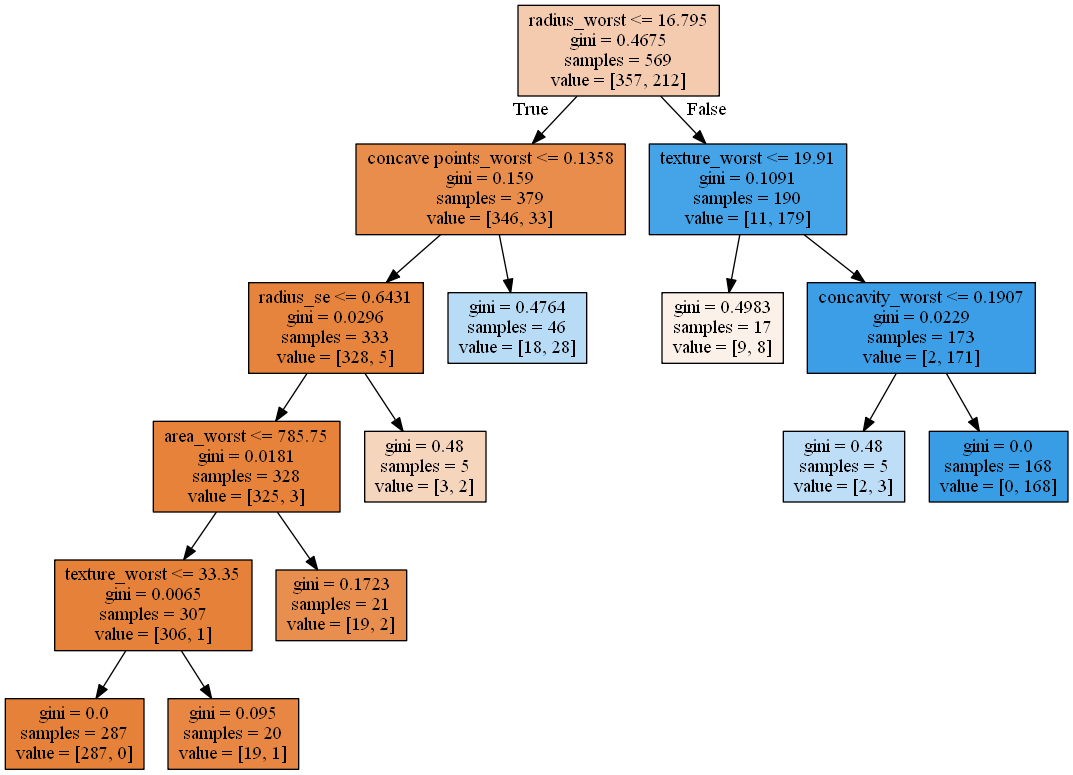

In [39]:
from sklearn import tree
from IPython.display import Image  
dot_data = tree.export_graphviz(cl, out_file=None, feature_names=df1.columns, filled=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

Random Forest Model 

In [22]:
predictor_var = ['radius_mean', 'texture_mean',  'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
model = RandomForestClassifier()
classification_model(model, traindf, predictor_var, outcome_var, testdf)

Accuracy : 99.246%
Accuracy in test data : 95.322%
Cross-Validation Score : 96.250%
Cross-Validation Score : 95.625%
Cross-Validation Score : 93.333%
Cross-Validation Score : 93.734%
Cross-Validation Score : 93.975%


In [23]:
testdf1 = testdf.drop('diagnosis', axis =1)
testdf1.shape
traindf1 = traindf.drop('diagnosis', axis = 1)

XGBoost 

In [24]:
import xgboost as xgb
regr= xgb.XGBClassifier(colsample_bytree=0.7,
                      gamma=0.0,
                      learning_rate=0.05,
                      max_depth=6,
                      min_child_weight=1.5,
                      n_estimators=7200,
                      reg_alpha=0.9,
                      reg_lambda=0.6,
                      subsample=0.2,
                      seed=42,
                      silent=1)
predictor_var = ['radius_mean', 'texture_mean',  'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
model = regr
classification_model(model, traindf, predictor_var, outcome_var, testdf)

Accuracy : 97.990%
Accuracy in test data : 95.322%
Cross-Validation Score : 95.000%
Cross-Validation Score : 95.000%
Cross-Validation Score : 92.917%
Cross-Validation Score : 92.156%
Cross-Validation Score : 91.446%
